In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
x,y=make_blobs(n_samples=1000, n_features=2, centers=3, random_state=23)

In [ ]:
x.shape

(1000, 2)

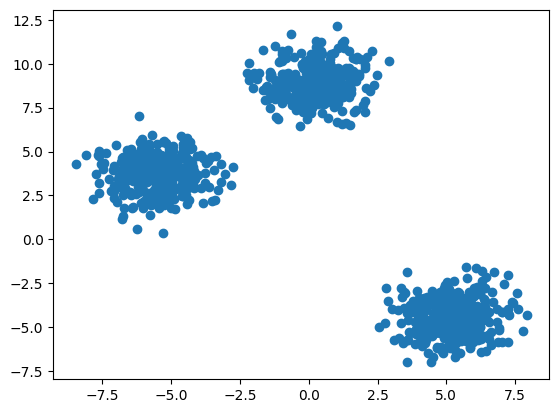

In [ ]:
plt.scatter(x[:,0],x[:,1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=23)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
##Manual Process to find K-Means
##Elbow Method to select K Value

wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(x_train)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[34131.539516172605,
 7986.924186891374,
 1345.6528673090697,
 1200.6272505280663,
 1043.616033818387,
 944.3841570647553,
 796.8304584820798,
 709.2336391046214,
 591.6717745191202,
 550.4718878258944]

Text(0, 0.5, 'WCSS')

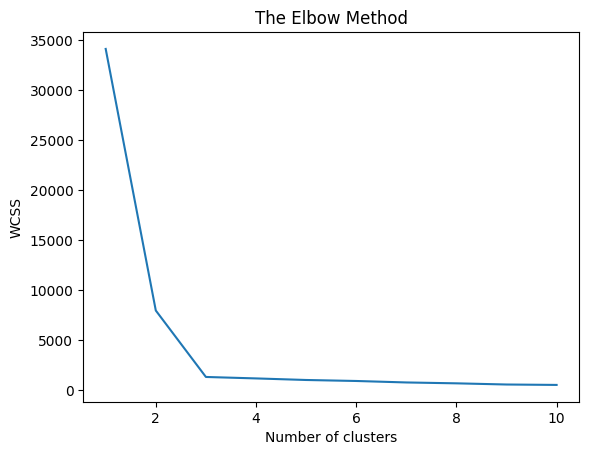

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Here we can see k=3

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [ ]:
ylabels=kmeans.fit_predict(x_train)

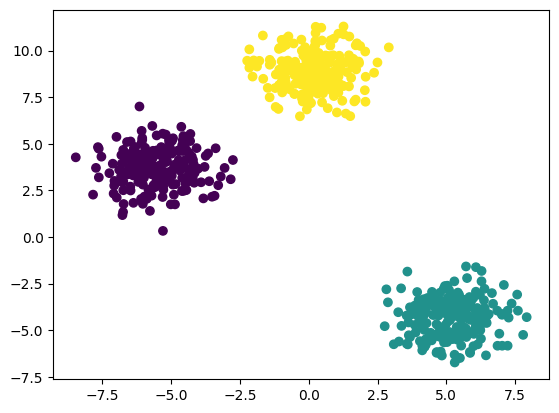

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1], c=ylabels)

In [ ]:
y_test_labels=kmeans.predict(x_test)

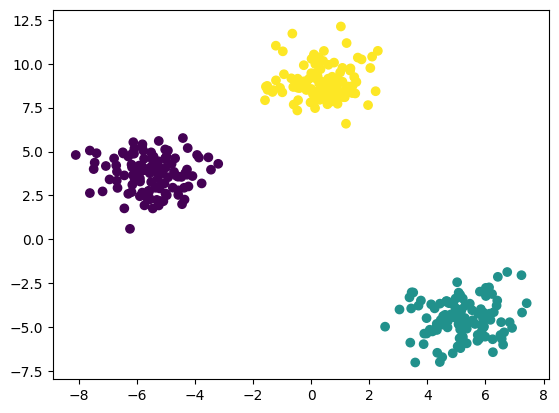

In [ ]:
plt.scatter(x_test[:,0],x_test[:,1], c=y_test_labels)

In [ ]:
!pip install kneed
from kneed import KneeLocator

In [ ]:
kl=KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
#curve will be convex if decreasing wcss and concave if vice versa
kl.elbow

np.int64(3)

In [ ]:
##Performance
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficient=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(x_train)
  score=silhouette_score(x_train, kmeans.labels_)
  silhouette_coefficient.append(score)

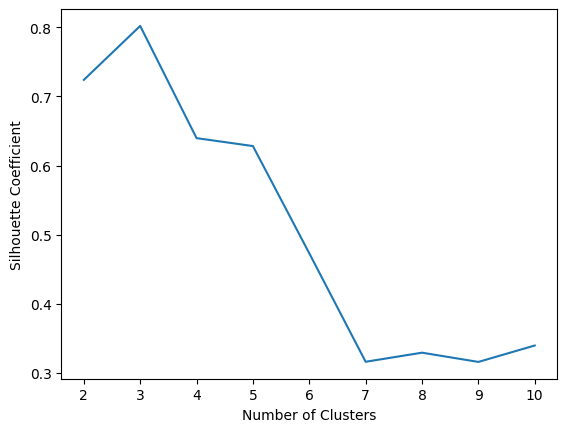

In [ ]:
plt.plot(range(2,11),silhouette_coefficient)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()